In [16]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configuración
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
sns.set(context="notebook", style="whitegrid")

In [13]:
CSV_PATH = "../data/raw/StudentPerformanceFactors.csv"

In [18]:
# 1) Carga
df = pd.read_csv(CSV_PATH)
print(f"🔎 Dimensiones del dataframe: {df.shape}")
display(df.head(10))

🔎 Dimensiones del dataframe: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [20]:
# 2) Tipos, nulos, duplicados
print("\n📌 Información de columnas y tipos:")
display(df.info())

nulos = df.isna().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({
    "nulos": nulos,
    "porc_nulos": (nulos / len(df) * 100).round(2)
})
print("\n🔧 Valores nulos por columna:")
display(missing_df.query("nulos > 0"))

dup = df.duplicated().sum()
print(f"🧾 Filas duplicadas: {dup}")


📌 Información de columnas y tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influen

None


🔧 Valores nulos por columna:


,nulos,porc_nulos
Parental_Education_Level,90,1.36
Teacher_Quality,78,1.18
Distance_from_Home,67,1.01


🧾 Filas duplicadas: 0


In [ ]:
# 3) Descriptivos
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("\n📊 Columnas numéricas:", num_cols)
print("📚 Columnas categóricas:", cat_cols)

print("\n📈 Estadísticos descriptivos (numéricas):")
display(df[num_cols].describe().T.round(3))

print("\n🏷️ Top 5 categorías por variable categórica:")
for c in cat_cols:
    print(f"\n• {c}")
    display(df[c].value_counts(dropna=False).head(5))


📊 Columnas numéricas: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
📚 Columnas categóricas: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

📈 Estadísticos descriptivos (numéricas):


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975,5.991,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977,11.547,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029,1.468,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.071,14.400,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.494,1.231,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.968,1.031,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.236,3.890,55.0,65.0,67.0,69.0,101.0



🏷️ Top 5 categorías por variable categórica:

• Parental_Involvement


Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


• Access_to_Resources


Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


• Extracurricular_Activities


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


• Motivation_Level


Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


• Internet_Access


Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


• Family_Income


Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


• Teacher_Quality


Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


• School_Type


School_Type
Public     4598
Private    2009
Name: count, dtype: int64


• Peer_Influence


Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


• Learning_Disabilities


Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


• Parental_Education_Level


Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64


• Distance_from_Home


Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64


• Gender


Gender
Male      3814
Female    2793
Name: count, dtype: int64

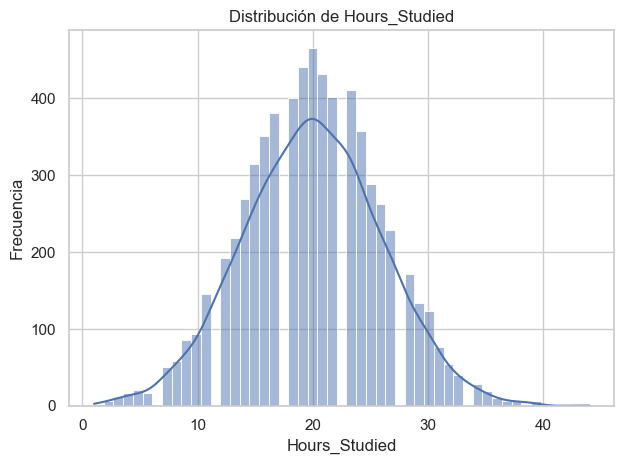

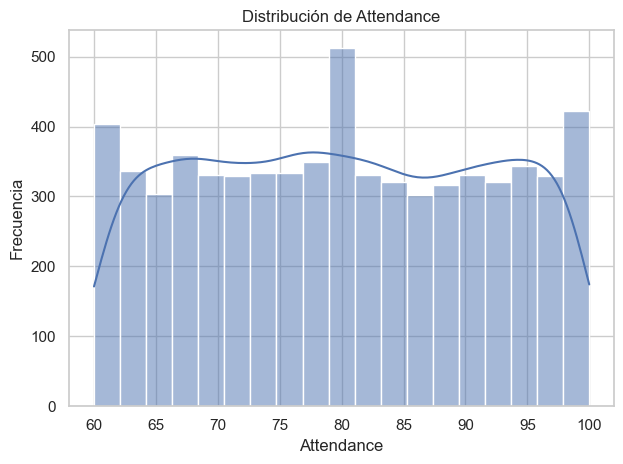

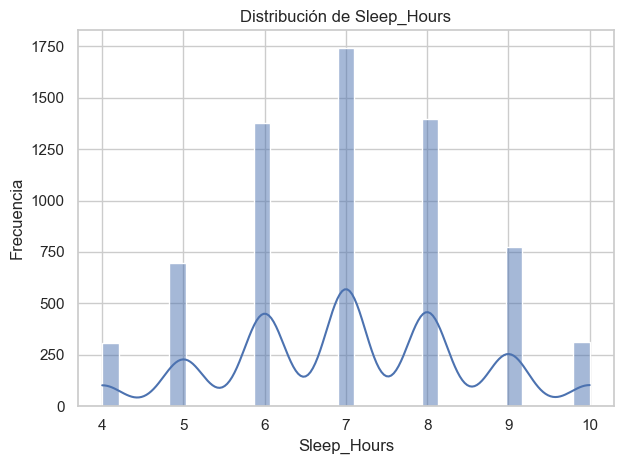

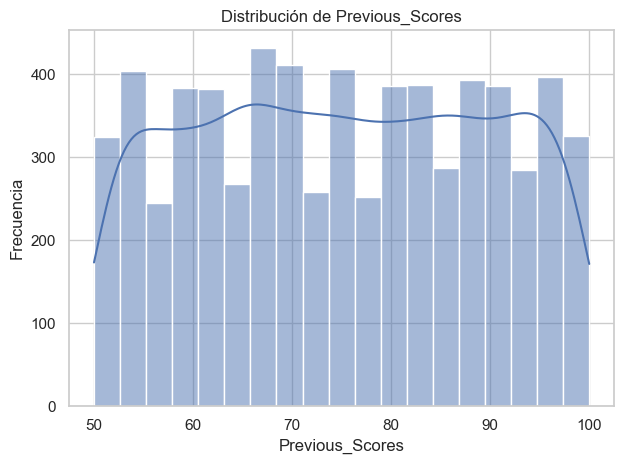

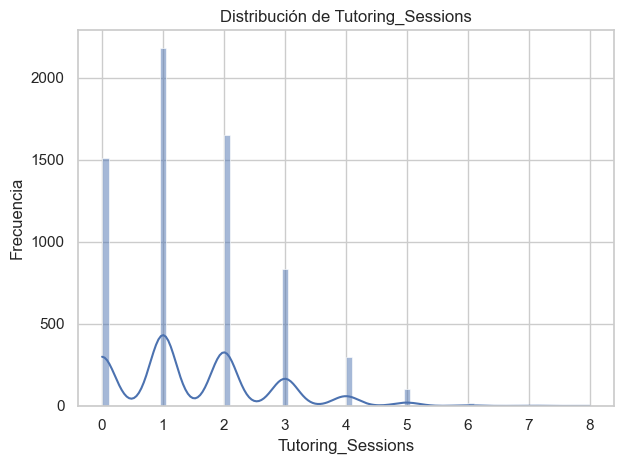

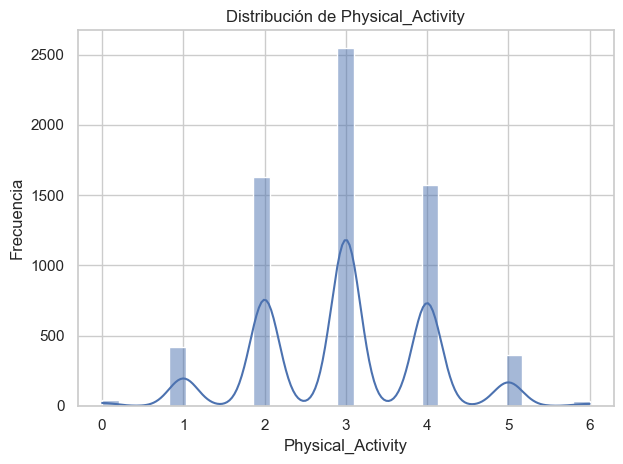

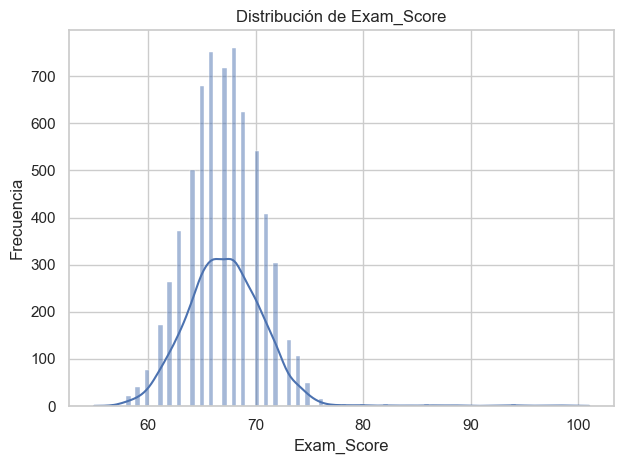

In [22]:
# 4) Distribuicones numéricas
for c in num_cols:
    plt.figure()
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Distribución de {c}")
    plt.xlabel(c)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

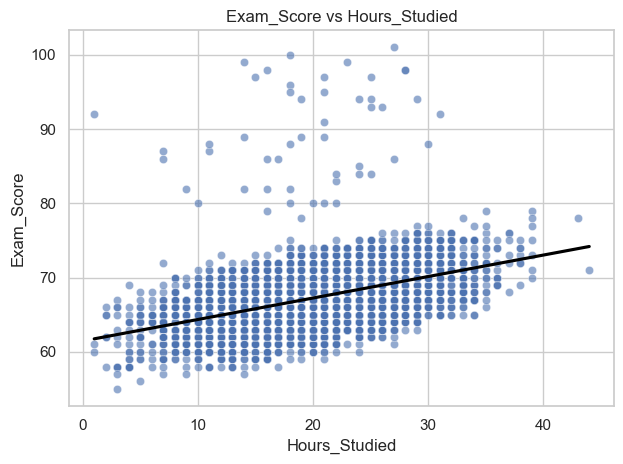

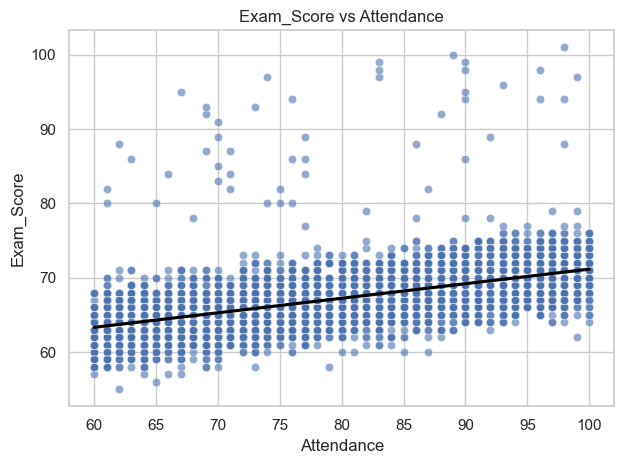

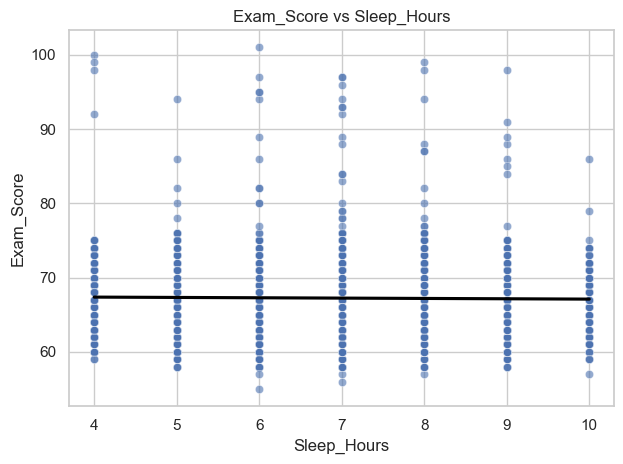

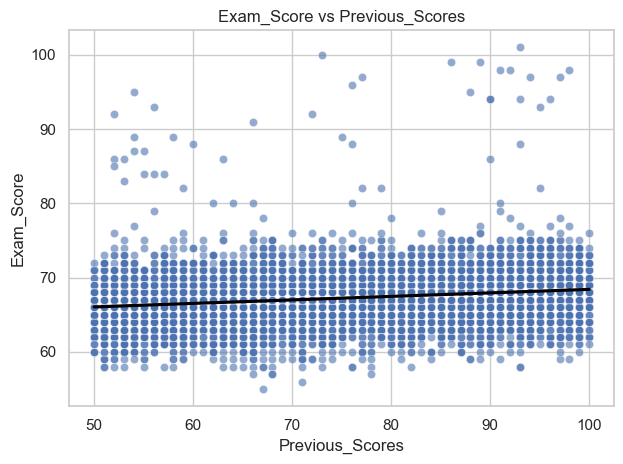

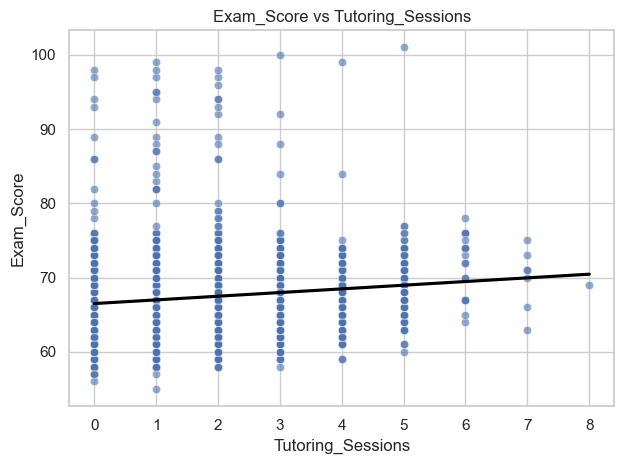

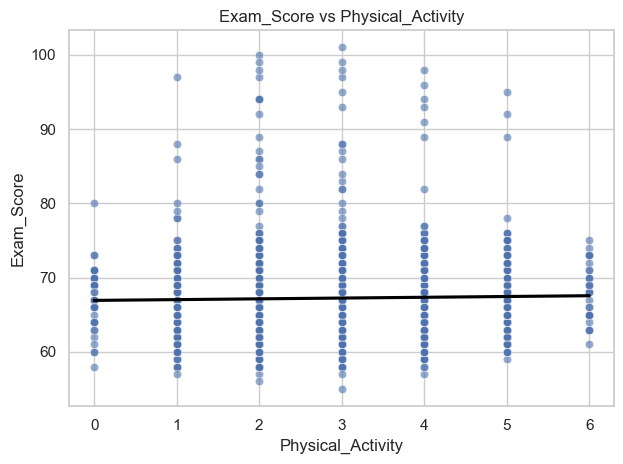

In [23]:
#  5) Relación con la variable objetivo
objetivo = "Exam_Score"
if objetivo in df.columns:
    # Dispersión con línea de tendencia para numéricas
    for c in [x for x in num_cols if x != objetivo]:
        plt.figure()
        sns.scatterplot(data=df, x=c, y=objetivo, alpha=0.6)
        sns.regplot(data=df, x=c, y=objetivo, scatter=False, ci=None, color="black")
        plt.title(f"{objetivo} vs {c}")
        plt.xlabel(c)
        plt.ylabel(objetivo)
        plt.tight_layout()
        plt.show()

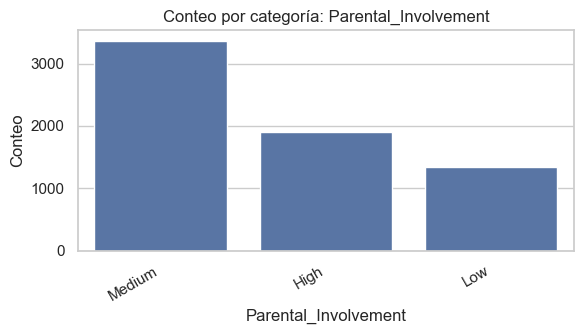

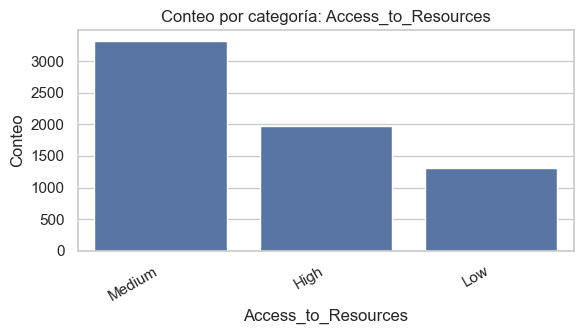

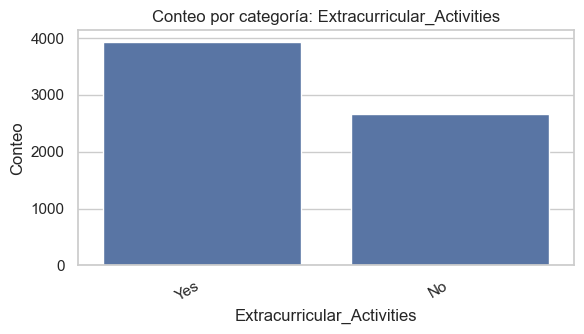

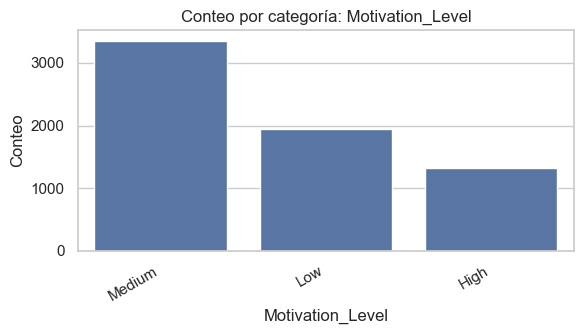

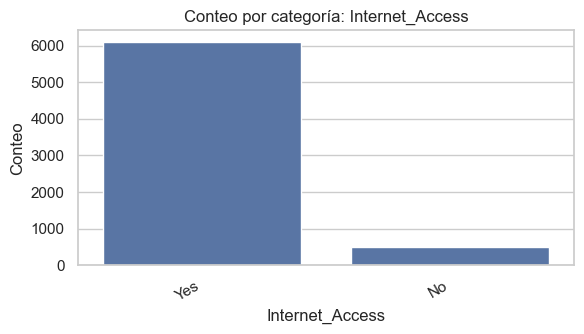

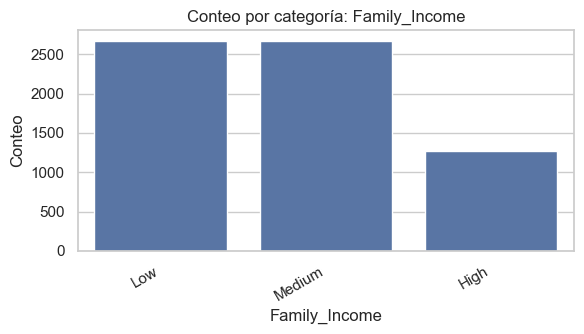

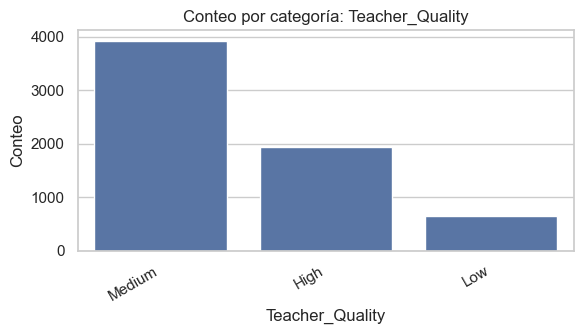

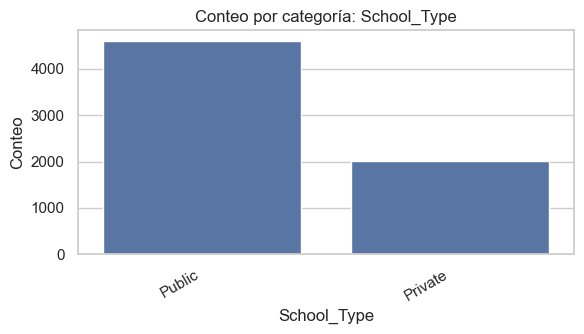

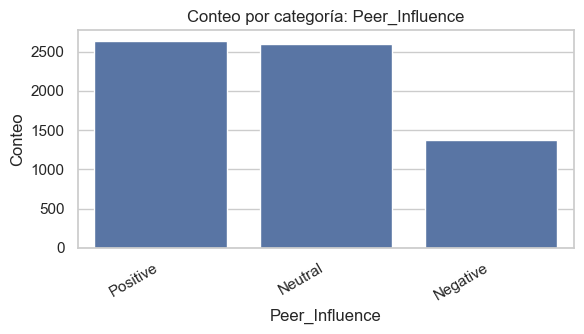

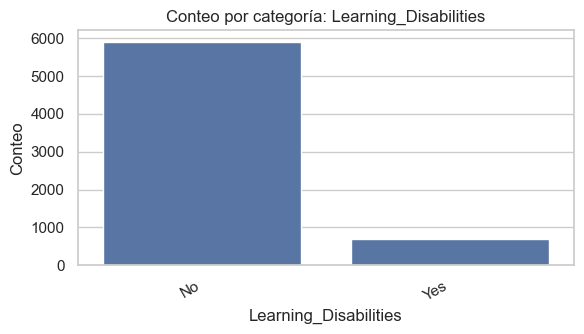

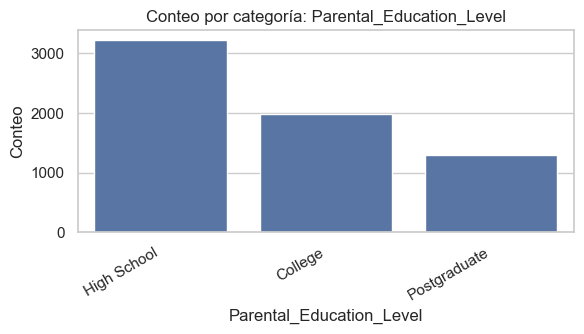

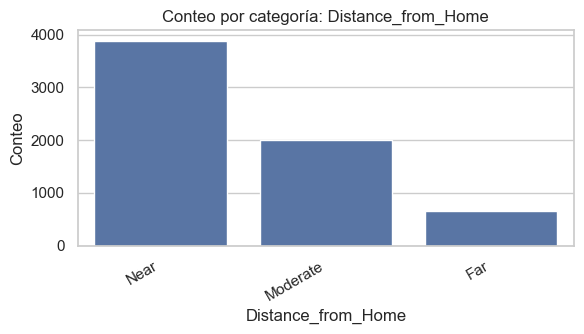

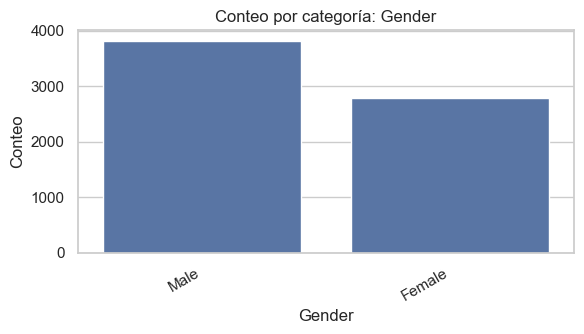

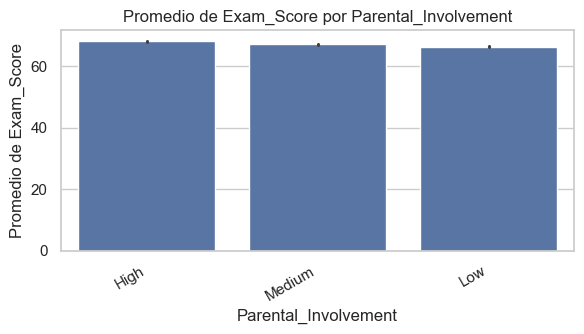

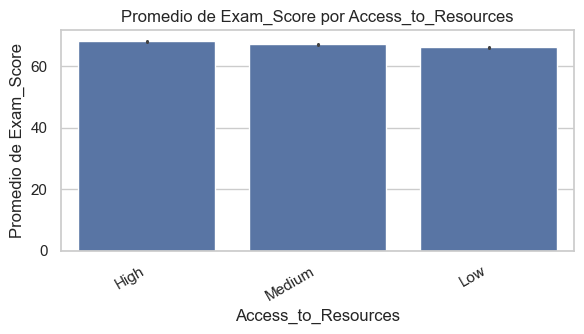

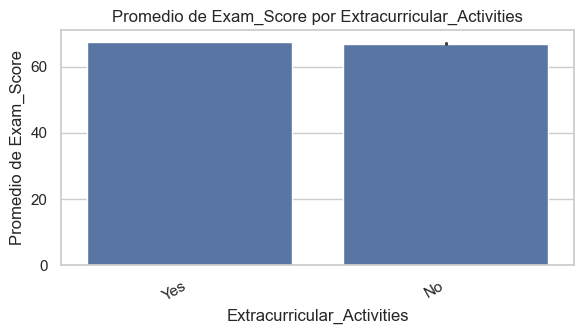

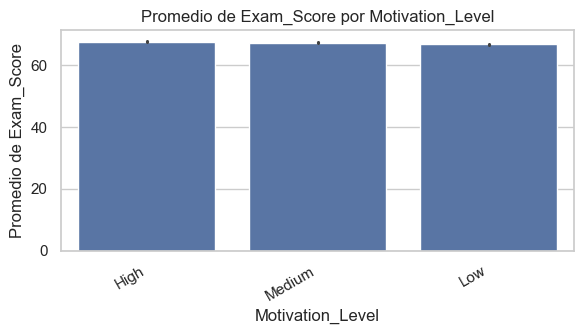

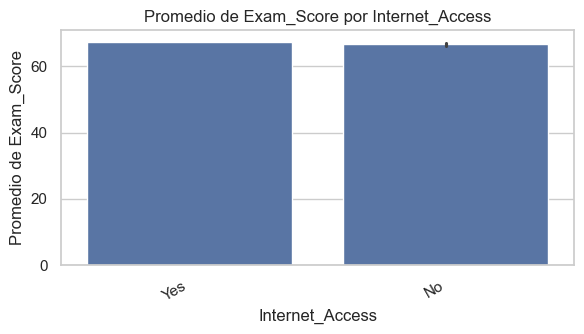

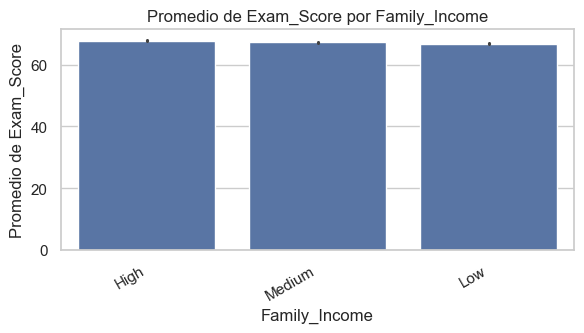

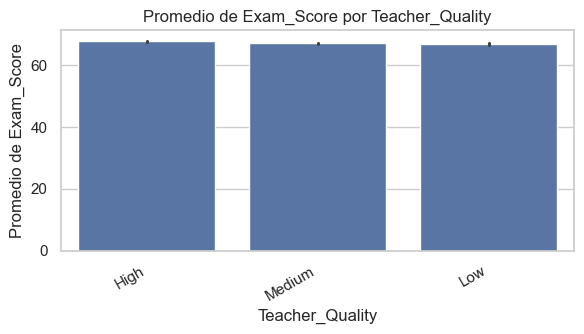

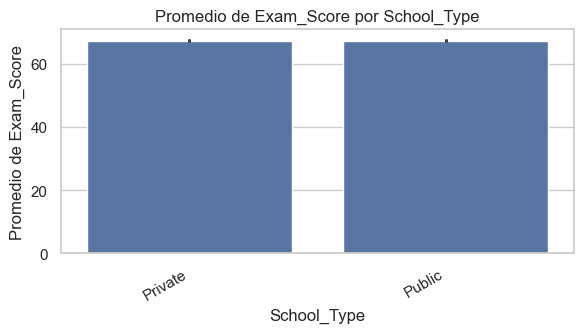

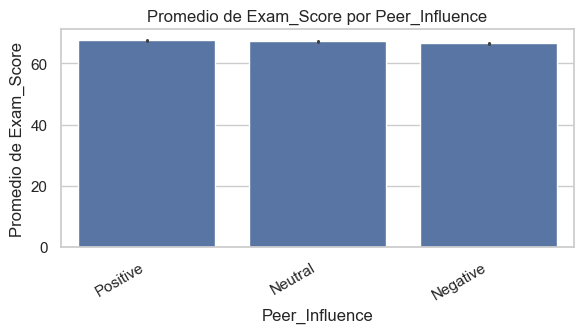

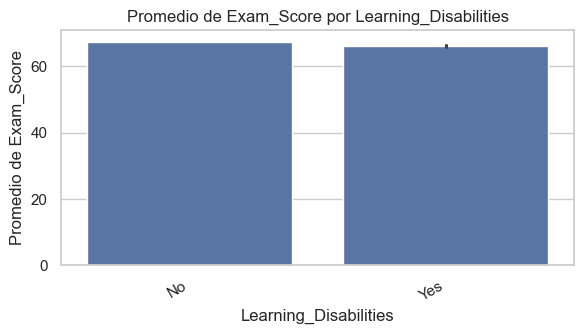

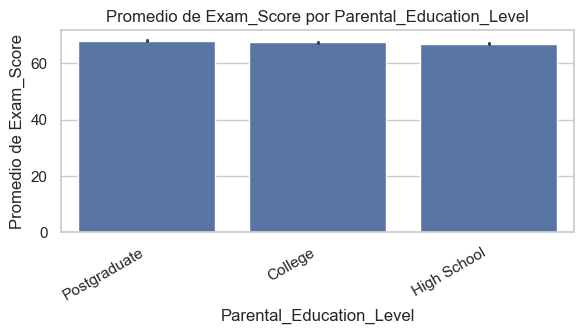

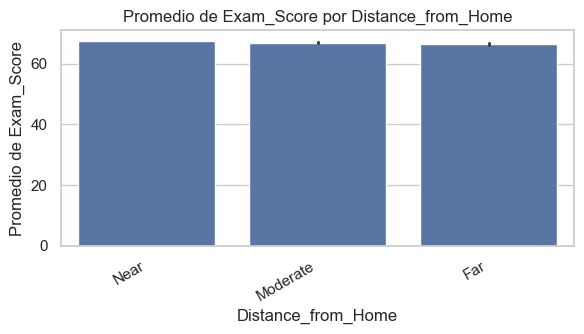

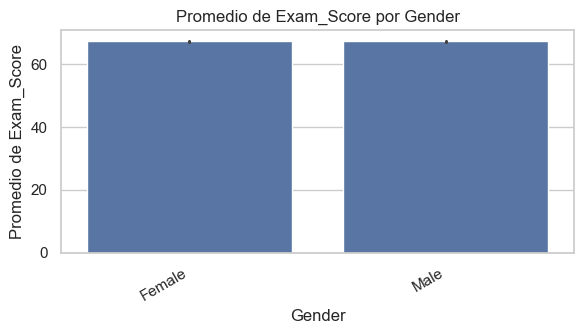

In [24]:
# 6) Categóricas: conteos y medias del objetivo
for c in cat_cols:
    plt.figure(figsize=(6, 3.5))
    orden = df[c].value_counts().index
    sns.countplot(data=df, x=c, order=orden)
    plt.title(f"Conteo por categoría: {c}")
    plt.xlabel(c)
    plt.ylabel("Conteo")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

if objetivo in df.columns:
    for c in cat_cols:
        if df[c].nunique() <= 10:
            plt.figure(figsize=(6, 3.5))
            orden = df.groupby(c)[objetivo].mean().sort_values(ascending=False).index
            sns.barplot(data=df, x=c, y=objetivo, order=orden, estimator=np.mean)
            plt.title(f"Promedio de {objetivo} por {c}")
            plt.xlabel(c)
            plt.ylabel(f"Promedio de {objetivo}")
            plt.xticks(rotation=30, ha="right")
            plt.tight_layout()
            plt.show()

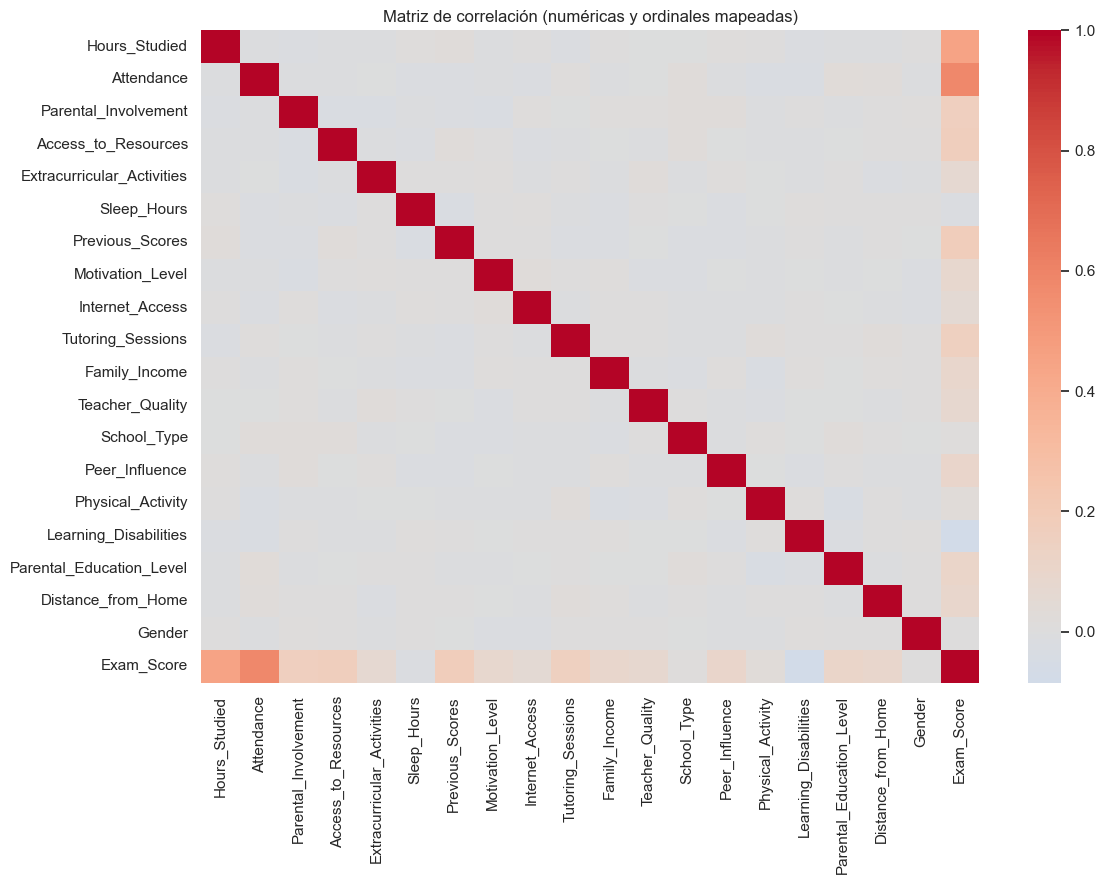


🔝 Mayores correlaciones (positivas) con Exam_Score:


,correlación_con_Exam_Score
Attendance,0.581
Hours_Studied,0.445
Previous_Scores,0.175
Access_to_Resources,0.170
Parental_Involvement,0.157
Tutoring_Sessions,0.157
Parental_Education_Level,0.104
Peer_Influence,0.100
Family_Income,0.095
Distance_from_Home,0.091



🔻 Mayores correlaciones (negativas) con Exam_Score:


,correlación_con_Exam_Score
Distance_from_Home,0.091
Motivation_Level,0.087
Teacher_Quality,0.076
Extracurricular_Activities,0.064
Internet_Access,0.051
Physical_Activity,0.028
School_Type,0.009
Gender,0.002
Sleep_Hours,-0.017
Learning_Disabilities,-0.085


In [25]:
# 7) Correlación (numéricas + ordinales)
ordinal_maps = {
    "Parental_Involvement": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Distance_from_Home": {"Far": 1, "Moderate": 2, "Near": 3},
    "School_Type": {"Public": 0, "Private": 1},
    "Gender": {"Male": 0, "Female": 1},
    "Internet_Access": {"No": 0, "Yes": 1},
    "Extracurricular_Activities": {"No": 0, "Yes": 1},
    "Learning_Disabilities": {"No": 0, "Yes": 1},
}

df_corr = df.copy()
for col, mapping in ordinal_maps.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

num_corr_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 9))
mat = df_corr[num_corr_cols].corr()
sns.heatmap(mat, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (numéricas y ordinales mapeadas)")
plt.tight_layout()
plt.show()

if objetivo in df_corr.columns:
    top = (
        mat[objetivo]
        .drop(labels=[objetivo])
        .sort_values(ascending=False)
        .to_frame("correlación_con_Exam_Score")
    )
    print("\n🔝 Mayores correlaciones (positivas) con Exam_Score:")
    display(top.head(10).round(3))
    print("\n🔻 Mayores correlaciones (negativas) con Exam_Score:")
    display(top.tail(10).round(3))

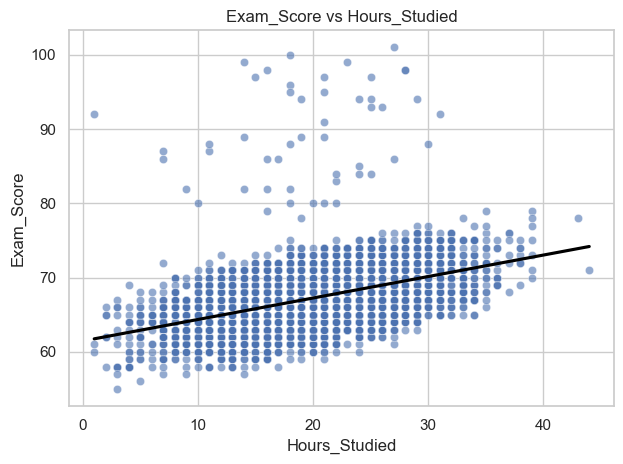

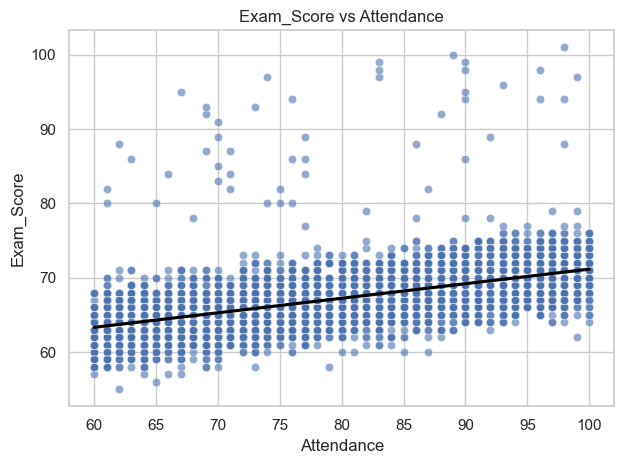

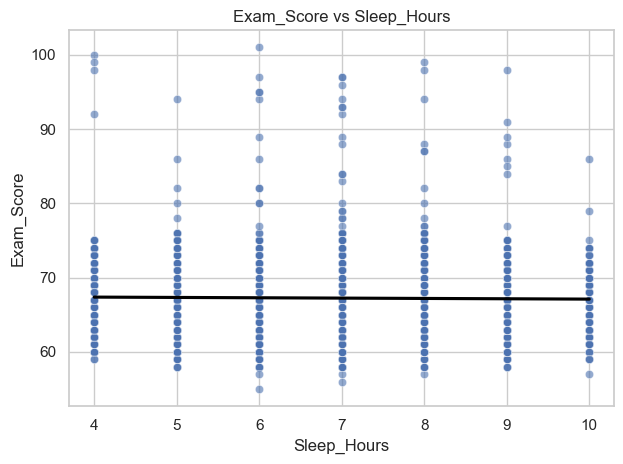

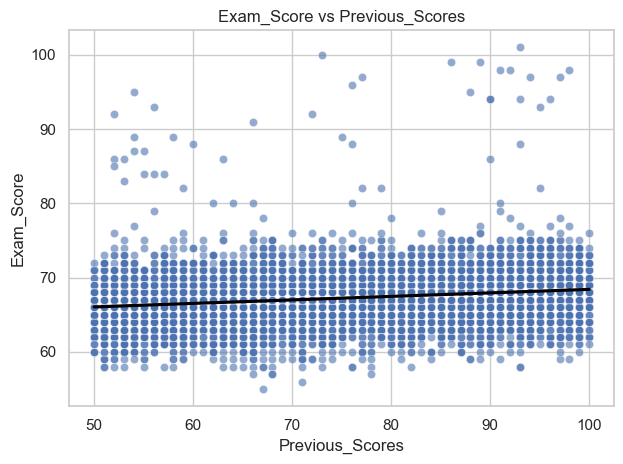

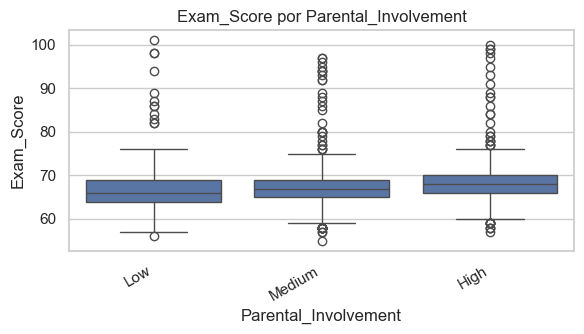

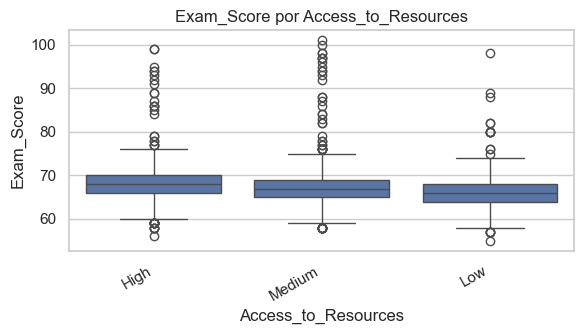

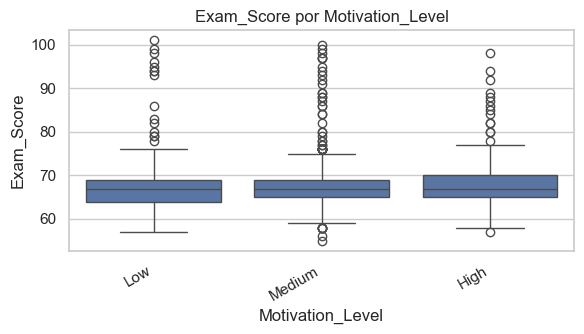

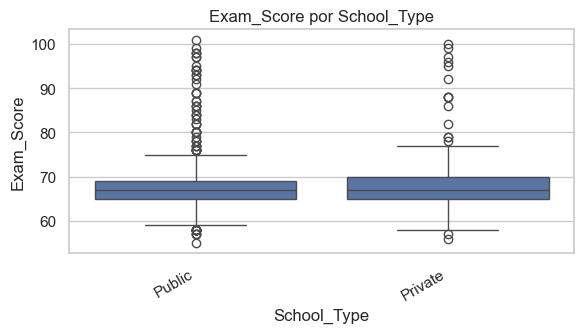

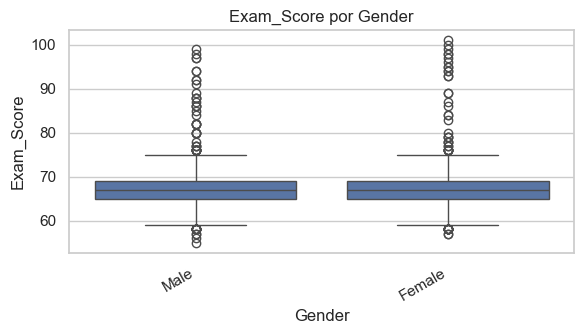

In [26]:
# 8) Relaciones clave adicionales
rel_vars = [v for v in ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"] if v in df.columns]
for v in rel_vars:
    plt.figure()
    sns.scatterplot(data=df, x=v, y=objetivo, alpha=0.6)
    sns.regplot(data=df, x=v, y=objetivo, scatter=False, ci=None, color="black")
    plt.title(f"{objetivo} vs {v}")
    plt.xlabel(v)
    plt.ylabel(objetivo)
    plt.tight_layout()
    plt.show()

cat_focus = [c for c in ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "School_Type", "Gender"] if c in df.columns]
for c in cat_focus:
    plt.figure(figsize=(6, 3.5))
    sns.boxplot(data=df, x=c, y=objetivo)
    plt.title(f"{objetivo} por {c}")
    plt.xlabel(c)
    plt.ylabel(objetivo)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

In [27]:
# 9) Resumen ejecutivo
def resumen_rapido(df, objetivo="Exam_Score"):
    num_cols_local = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols_local = [c for c in df.columns if c not in num_cols_local]
    resumen = {
        "filas": df.shape[0],
        "columnas": df.shape[1],
        "filas_con_algún_nulo": int(df.isnull().any(axis=1).sum()),
        "num_variables_numéricas": len(num_cols_local),
        "num_variables_categóricas": len(cat_cols_local),
    }
    if objetivo in df.columns:
        resumen.update({
            "objetivo_media": float(df[objetivo].mean()),
            "objetivo_desv_std": float(df[objetivo].std()),
            "objetivo_min": float(df[objetivo].min()),
            "objetivo_max": float(df[objetivo].max()),
        })
    return pd.Series(resumen)

print("\n🧭 Resumen ejecutivo del dataset:")
display(resumen_rapido(df, objetivo).to_frame("valor"))


🧭 Resumen ejecutivo del dataset:


,valor
filas,6607.000000
columnas,20.000000
filas_con_algún_nulo,229.000000
num_variables_numéricas,7.000000
num_variables_categóricas,13.000000
objetivo_media,67.235659
objetivo_desv_std,3.890456
objetivo_min,55.000000
objetivo_max,101.000000
